### 2021 Spring "EE479: Scientific Computing & Data"
#### Dr. J. Park, KAIST Electrical Engineering
#### Brunton&Kutz 6.4 The Stochastic Gradient Descent Algorithm
#### 2021. 05. 18 Revised from matlab version

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [6, 6]

In [2]:
iterMax = 100
h = 0.1
x_grid = np.arange(-6,6+h,h)
y_grid = np.copy(x_grid)
n = len(x_grid)
X,Y = np.meshgrid(x_grid,y_grid) # N.B. meshgrid makes x along x (axis=1) and y along y (axis=0); coodinates (matrix)

F1 = 1.5 - 1.6*np.exp(-0.05*(3*np.power(X+3,2)+np.power(Y+3,2)))
F = F1 + (0.5 - np.exp(-0.1*(3*np.power(X-3,2)+np.power(Y-3,2))))
dFy,dFx = np.gradient(F,h,h) # N.B. np.gradient calculate first along axis=0, then along axis=1 in mattrix

x0 = np.array([4,0,-5])
y0 = np.array([0,-5,2])

x = np.zeros(iterMax+1)
y = np.copy(x)
f = np.copy(x)

x_out = np.zeros((iterMax+1,3));
y_out = np.copy(x_out)
f_out = np.copy(x_out)

interp_type = 'linear'

ndata=10
for jj in range(3):
    ### submatrix sampling: 
    q = np.random.permutation(n)
    i1 = np.sort(q[:ndata])
    q2 = np.random.permutation(n)
    i2 = np.sort(q2[:ndata])
    x[0] = x0[jj]
    y[0] = y0[jj]
    np.savez("submatrix.npz", xarr=i1, yarr=i2)
    
    F_i12 = F[i1[:, np.newaxis],i2]
    dFx_i12 = dFx[i1[:, np.newaxis],i2]
    dFy_i12 = dFy[i1[:, np.newaxis],i2]
    
    F_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], F_i12, kind=interp_type)
    dfx_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFx_i12, kind=interp_type)
    dfy_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFy_i12, kind=interp_type)
    
    f[0] = F_interp(x[0],y[0])
    dfx = dfx_interp(x[0],y[0])
    dfy = dfy_interp(x[0],y[0])
    
#     tau = 2
    tau = 1.5
    ### in every iteration step, redo data sampling: in (121*121) randomly choose (10*10) data
    for j in range(iterMax):
        x[j+1] = x[j]-tau*dfx
        y[j+1] = y[j]-tau*dfy
        q = np.random.permutation(n)
        i1 = np.sort(q[:ndata])
        q2 = np.random.permutation(n)
        i2 = np.sort(q2[:ndata])
        
        F_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], F_i12, kind=interp_type)
        dfx_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFx_i12, kind=interp_type)
        dfy_interp = interpolate.interp2d(x_grid[i1], y_grid[i2], dFy_i12, kind=interp_type)
        
        f[j+1] = F_interp(x[j+1],y[j+1])
        dfx = dfx_interp(x[j+1],y[j+1])
        dfy = dfy_interp(x[j+1],y[j+1])
        ### evoke converge when f(i), that is F(i), is stabilized
        if np.abs(f[j+1]-f[j]) < 10**(-6): # check convergence
            print('Converged after {} iterations'.format(j+1))
            break
        if j == iterMax-1:
            print('Failed to converge after {} iterations'.format(j+1))
    x_out[:,jj] = x
    y_out[:,jj] = y
    f_out[:,jj] = f
    
    # If converged before iterMax, replace 0s with NaNs
    x_out[(j+2):,jj] = np.nan
    y_out[(j+2):,jj] = np.nan
    f_out[(j+2):,jj] = np.nan


Failed to converge after 100 iterations
Failed to converge after 100 iterations
Failed to converge after 100 iterations


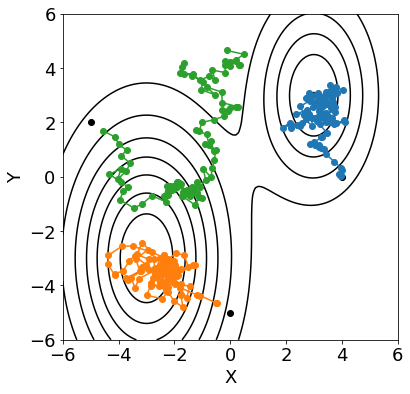

In [3]:
fig = plt.figure()
ax  = plt.axes()
ax.contour(X,Y,F,colors='k')
for jj in range(3):
    ax.plot(x_out[1:,jj],y_out[1:,jj],'o-')
    ax.scatter(x_out[0,jj], y_out[0,jj], color='k')
ax.set_xlabel('X')    
ax.set_ylabel('Y')
plt.show()

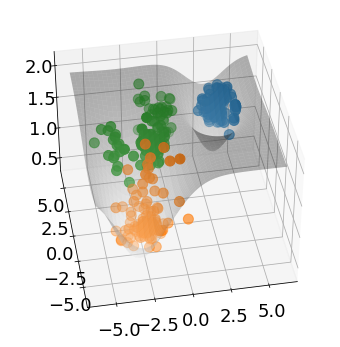

In [4]:
fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
ax.plot_surface(X, Y, F,linewidth=0,cmap='binary',alpha=0.3)
for jj in range(3):
    ax.scatter(x_out[:,jj],y_out[:,jj],f_out[:,jj]+0.1,'o',s=100)
ax.view_init(elev=40, azim=-100)
plt.show()